In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
import PIL
from cloudstor import cloudstor

# Download the 'raw data'

We have the topography data available on cloudstor for download and re-sizing.
We also have the resized data there to save the effort of re-doing this work.

The access to anonymous directories is via the cryptic link that can be obtained from the website.

In [179]:
teaching_data_dir = cloudstor(url="L93TxcmtLQzcfbk", password='')

# glucifer_tex_maps = cloudstor(url="WRG3gSEpY3j9GEW", password='')

Cloudstore connection established


In [194]:
print(teaching_data.list("Venus"))
print(teaching_data.list("Mars"))
print(teaching_data.list("Moon"))

['RadarBrightness.jpg', 'TopographyMap.jpg', 'Venus_Magellan_Topography_Global_4641m_v02.tif']
['MarsTopo3600x1800.tif', 'Mars_MGS_MOLA_DEM_mosaic_global_463m.tif']
[]


In [185]:
# teaching_data.download_file("Venus/Venus_Magellan_Topography_Global_4641m_v02.tif", "Venus_Magellan_Topography_Global_4641m_v02.tif" )teaching_data.download_file("Venus/Venus_Magellan_Topography_Global_4641m_v02.tif", "Venus_Magellan_Topography_Global_4641m_v02.tif" )
# teaching_data.download_file("Mars/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif", "Mars_MGS_MOLA_DEM_mosaic_global_463m.tif" )
# teaching_data.download_file("Moon/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif", "Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014.tif" )

# Read as images / re-size

Note that the imageio does not actually read the data from disk here but creates a way to access the image.
We can then view a subsample of the image data 



In [ ]:
## This works too:
# PIL.Image.MAX_IMAGE_PIXELS = 233312401 + 1
# img = PIL.Image.open("etopo1_grayscale_hillshade_no_compr.tiff" )
# img2 = img.resize((7200,3600))
# img2.save("etopo1_grayscale_hillshade_small.tif")

In [212]:
img = imageio.imread("/Users/lmoresi/cloudstor/Datasets4Teaching/Moon/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014.tif")
print(img.shape)
img2 = PIL.Image.fromarray(img.view()[::20,::20])
print(img2.size)
img3 = img2.resize((3600,1800))
img3.save("MoonTopo3600x1800.tif")

(46080, 92160)
(4608, 2304)


In [220]:
img = imageio.imread("Venus_Magellan_Topography_Global_4641m_v02.tif")
print(img.shape)
img2 = PIL.Image.fromarray(img.view()[::2,::2])
img3 = img2.resize((3600,1800))
print(img3.size)
img3.save("VenusTopo3600x1800.tif")

(4096, 8192)
(3600, 1800)


In [214]:
img = imageio.imread("/Users/lmoresi/cloudstor/Datasets4Teaching/Mars/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif")
print(img.shape)
img2 = PIL.Image.fromarray(img.view()[::10,::10])
print(img2.size)
img3 = img2.resize((3600,1800))
img3.save("MarsTopo3600x1800.tif")

(23040, 46080)
(4608, 2304)


## Verify that the data are correctly resized

Never trust a process that uses this much complex machinery ... it could crash at any point.


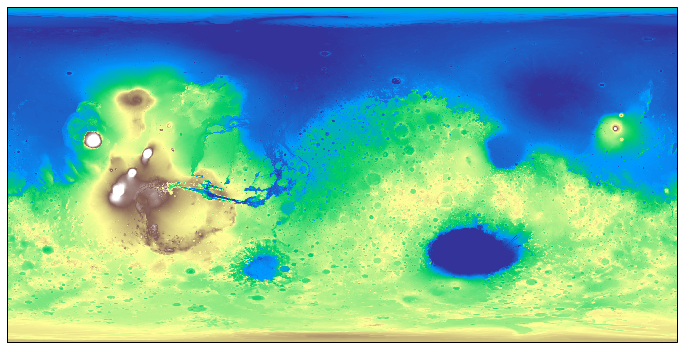

In [219]:
img = imageio.imread("MarsTopo3600x1800.tif")

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm 

projection1 = ccrs.Orthographic(central_longitude=-60.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide()
flat_projection = ccrs.PlateCarree()

global_extent     = [-180.0, 180.0, -90.0, 90.0]

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.subplot(111, projection=flat_projection)
ax.set_global()

ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), extent=global_extent, zorder=0, cmap=cm.terrain, vmin=-5000, vmax=10000)

plt.show()